In [1]:

import sqlite3
import pandas as pd
pd.set_option("display.float_format", str)

import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
conn = sqlite3.connect('airlines_db.sqlite')
cursor = conn.cursor()


tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)


tables

,type,name,tbl_name,rootpage,sql
0,table,aircrafts_data,aircrafts_data,2,CREATE TABLE aircrafts_data (\r\n aircraft_...
1,table,airports_data,airports_data,3,CREATE TABLE airports_data (\r\n airport_co...
2,table,boarding_passes,boarding_passes,4,CREATE TABLE boarding_passes (\r\n ticket_n...
3,table,bookings,bookings,5,CREATE TABLE bookings (\r\n book_ref charac...
4,table,flights,flights,6,CREATE TABLE flights (\r\n flight_id intege...
5,table,seats,seats,7,CREATE TABLE seats (\r\n aircraft_code char...
6,table,ticket_flights,ticket_flights,8,CREATE TABLE ticket_flights (\r\n ticket_no...
7,table,tickets,tickets,9,CREATE TABLE tickets (\r\n ticket_no charac...


In [2]:
import pymysql
import pandas as pd 


connection = pymysql.Connection(
    host="localhost",
    user="root",
    password="Suraj@123" ,
    database="aircraft_data"

)


In [3]:
aircraft_data = pd.read_sql_query("select * from aircrafts_data" , conn)

aircraft_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [4]:
airport_data = pd.read_sql_query("select * from airports_data" , conn)
airport_data.head()


,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [5]:
boarding_passes = pd.read_sql_query("select * from Boarding_passes" , conn)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [6]:
flights = pd.read_sql_query("select * from flights" , conn)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [7]:
seats = pd.read_sql_query("select * from seats" , conn )
seats.head()


,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [8]:
ticket_flights = pd.read_sql_query("select * from ticket_flights" , conn)
ticket_flights.head()


,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [9]:
bookings = pd.read_sql_query("select * from bookings" , conn)
bookings.head()





,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [10]:
tickets = pd.read_sql_query("select * from tickets" , conn)
tickets.head()



,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [11]:
pd.read_sql_query("""select aircraft_code , count(seat_no) as total_seats
                  from seats
                  group by  aircraft_code
                  having total_seats >= 100""" , con=conn)

,aircraft_code,total_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


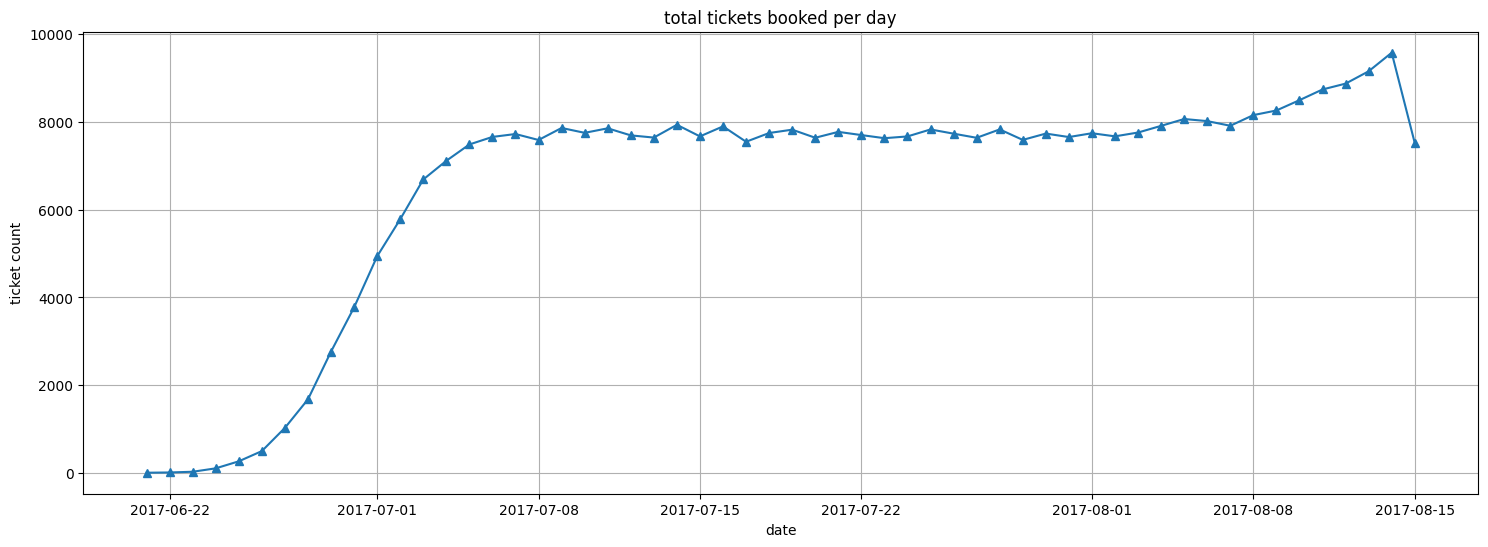

In [12]:
tickets = pd.read_sql_query("""
                select  *
                  from  bookings  as B
                  inner join tickets as T on B.book_ref = T.book_ref """, conn)
tickets["book_date"] = pd.to_datetime(tickets["book_date"])
tickets["date"] = tickets["book_date"].dt.date

x = tickets.groupby("date")["ticket_no"].count().reset_index()


import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))
plt.plot(x["date"] , x["ticket_no"], marker="^")

plt.title("total tickets booked per day")
plt.xlabel("date")
plt.ylabel("ticket count")
plt.grid("b")
plt.show()

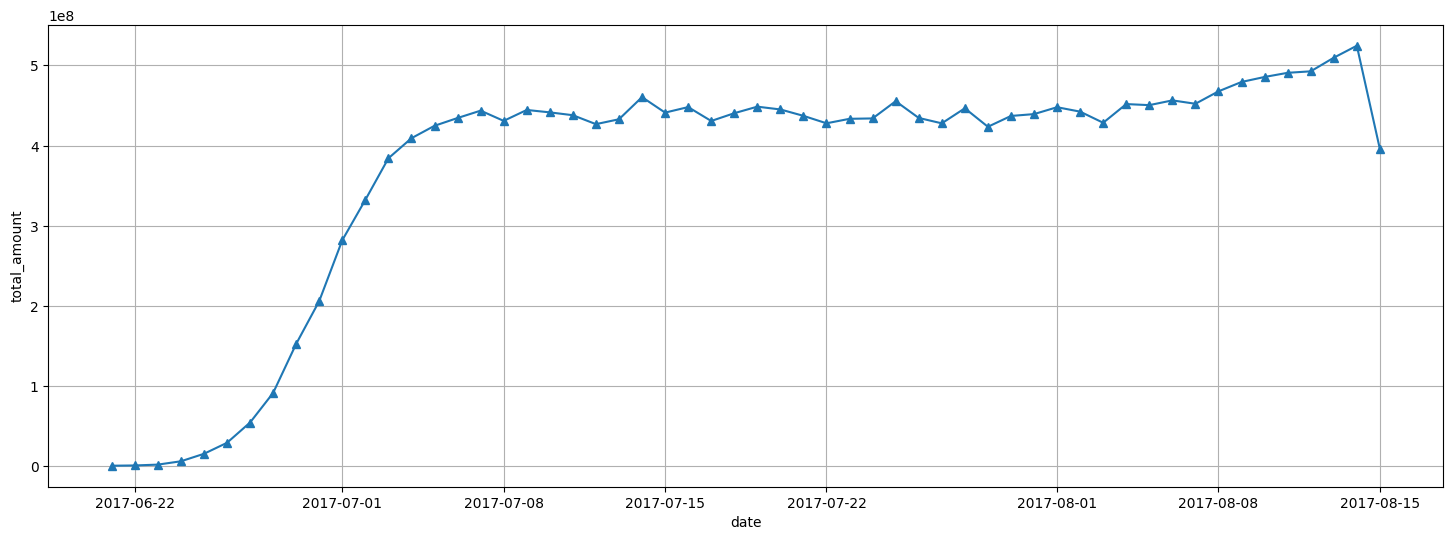

In [13]:
booking = pd.read_sql_query(""" select * from bookings """ , conn )
booking['book_date'] = pd.to_datetime(booking["book_date"])
booking["date"] =booking["book_date"].dt.date
amount = booking.groupby("date")["total_amount"].sum().reset_index()

plt.figure(figsize=(18,6))
plt.plot(amount["date"] , amount["total_amount"], marker="^")
plt.xlabel("date")
plt.ylabel("total_amount")
plt.grid("b")
plt.show()



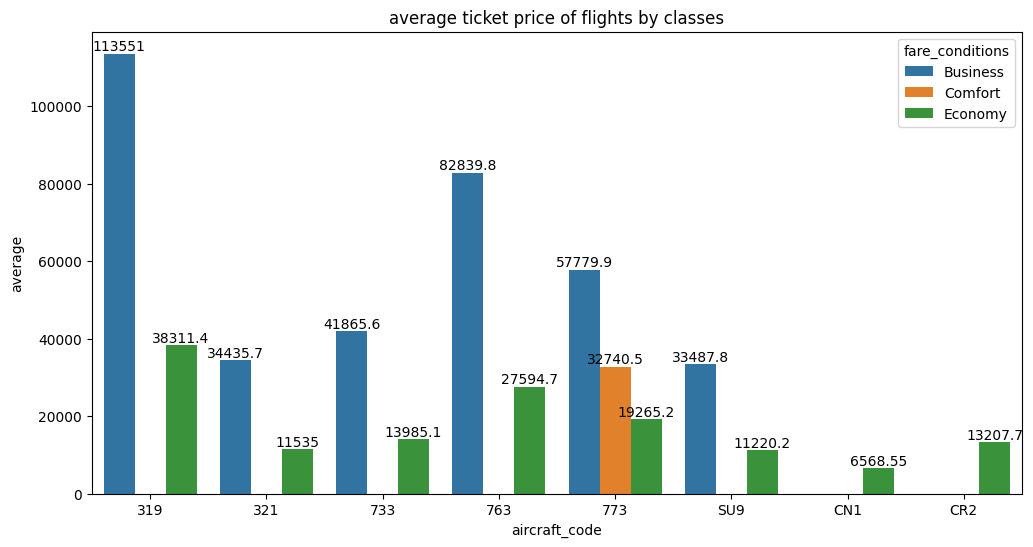

In [14]:

# fare condition aircreaft and charges 
df = pd.read_sql_query("""select t.fare_conditions , round(avg(t.amount),2) as average , f.aircraft_code
                   from ticket_flights T inner  join flights F on T.flight_id = f.flight_id 
                    group by fare_conditions , aircraft_code  """, conn)


import seaborn as sns 
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df , x="aircraft_code",y="average", hue="fare_conditions")
for container in ax.containers:
    ax.bar_label(container)
plt.title("average ticket price of flights by classes")
plt.show()


## Analyze occypancy rate

In [15]:
revenue_per_ticket = pd.read_sql_query(""" select aircraft_code , 
                            total_revenue , 
                            total_tickets , 
                            (total_revenue/total_tickets) as revenue_per_ticket 
                            from
                                (select distinct f.aircraft_code , sum(t.amount) as total_revenue , count( ticket_no) as total_tickets
                                from ticket_flights t inner join flights f on t.flight_id =f.flight_id
                                group by f.aircraft_code) as total;
                    """ , conn)
revenue_per_ticket

,aircraft_code,total_revenue,total_tickets,revenue_per_ticket
0,319,2706163100,52853,51201
1,321,1638164100,107129,15291
2,733,1426552100,86102,16568
3,763,4371277100,124774,35033
4,773,3431205500,144376,23765
5,CN1,96373800,14672,6568
6,CR2,1982760500,150122,13207
7,SU9,5114484700,365698,13985


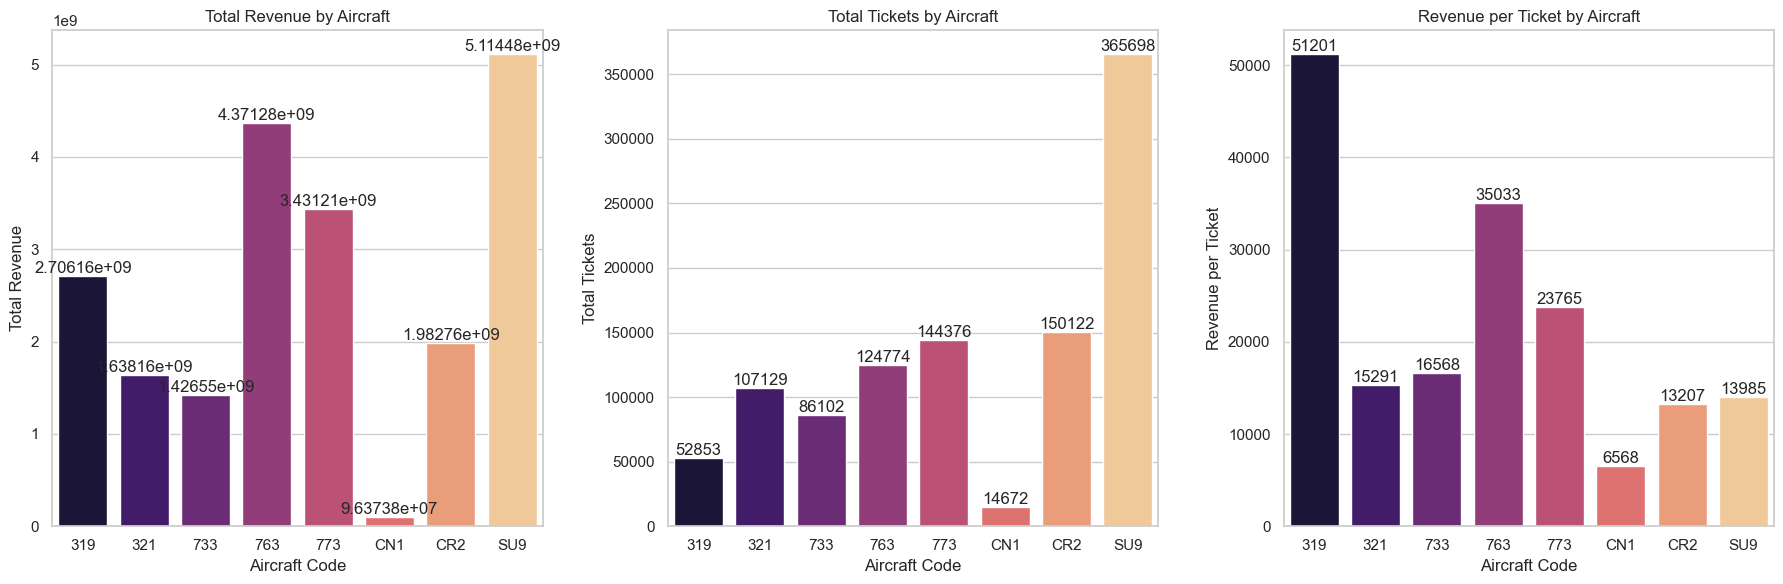

In [16]:

df = pd.DataFrame(revenue_per_ticket)

# Set the Seaborn style
sns.set(style="whitegrid")

# Creating subplots
plt.figure(figsize=(18, 6))

# Plot for Total Revenue
plt.subplot(1, 3, 1)
ax= sns.barplot(x="aircraft_code", y="total_revenue", data=df, palette="magma")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Total Revenue by Aircraft')
plt.xlabel('Aircraft Code')
plt.ylabel('Total Revenue')

# Plot for Total Tickets
plt.subplot(1, 3, 2)
ax1 = sns.barplot(x="aircraft_code", y="total_tickets", data=df, palette="magma")
for container in ax1.containers:
    ax1.bar_label(container)

plt.title('Total Tickets by Aircraft')
plt.xlabel('Aircraft Code')
plt.ylabel('Total Tickets')

# Plot for Revenue per Ticket
plt.subplot(1, 3, 3)
ax2 = sns.barplot(x="aircraft_code", y="revenue_per_ticket", data=df, palette="magma")
for container in ax2.containers:
    ax2.bar_label(container)
plt.title('Revenue per Ticket by Aircraft')
plt.xlabel('Aircraft Code')
plt.ylabel('Revenue per Ticket')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Total Revenue')

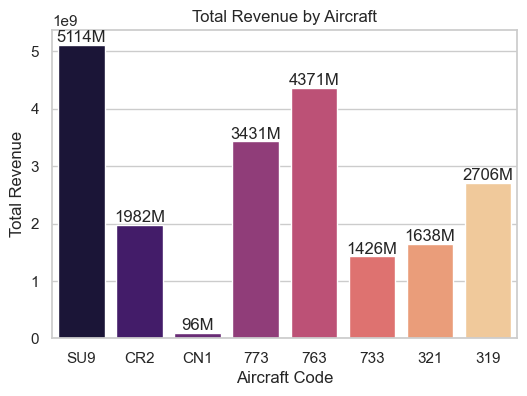

In [64]:
df_ = df[["aircraft_code" , "total_revenue"]]
df_.sort_values("aircraft_code" , ascending=False, inplace=True)
plt.figure(figsize=(6,4))
ax= sns.barplot(x="aircraft_code", y="total_revenue", data=df_, palette="magma")
for container in ax.containers:
    ax.bar_label(container , [f'{int(label/1e6)}M' for label in container.datavalues])
plt.title('Total Revenue by Aircraft')
plt.xlabel('Aircraft Code')
plt.ylabel('Total Revenue')


## calculate average occupacy per air craft

In [70]:
occupancy_rate = pd.read_sql_query("""
                                    with cte as (
                                                    select 
                                                            f.aircraft_code , f.flight_id , count(*) as total_booking 
                                                            from flights f inner join boarding_passes b on f.flight_id =b.flight_id 
                                                            group by f.aircraft_code , f.flight_id),
                                                                    total_seats as (
                                                                                    select aircraft_code , count(seat_no) as total_seats
                                                                                    from seats
                                                                                    group by  aircraft_code
                                                                                    )
                                                    select 
                                                            c.aircraft_code , round(avg(c.total_booking) ,2) as total_book , t.total_seats ,
                                                            round((avg(c.total_booking)/t.total_seats),3) as occupancy_rate 
                                                            from cte c inner join total_seats t on c.aircraft_code= t.aircraft_code
                                                            group by c.aircraft_code
                                                                                    """ , conn)

total_revenue = pd.read_sql_query(""" select f.aircraft_code , sum(tf.amount)as total_revenue
         from ticket_flights tf 
        inner join flights f on tf.flight_id=f.flight_id 
        group by f.aircraft_code""" , conn)

occupancy_rate.sort_values("aircraft_code",inplace=True ,ascending=False )

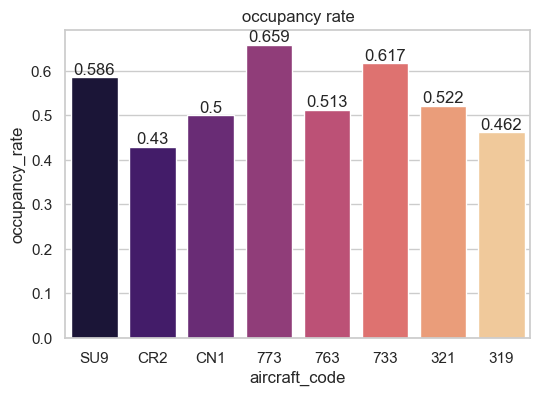

In [71]:
plt.figure(figsize=(6,4))

axe = sns.barplot(x=occupancy_rate["aircraft_code"] ,y= occupancy_rate["occupancy_rate"] ,palette="magma")

for con in axe.containers:
    axe.bar_label(con)

plt.title("occupancy rate")
plt.show()

1. High Revenue but Suboptimal Occupancy (763, 319, 321)
763 (Boeing 767-300):<br>
High revenue and ticket sales, but low occupancy (51.3%).<br>
319 & 321 (Airbus A319/A321):<br>
319 has high revenue per ticket, but occupancy is just 46.2%.<br>
321 has 52.2% occupancy, which is relatively low.<br>
Strategy:<br>
Improve demand by targeting pricing strategies (discounts, promotions) to boost occupancy.<br>
Consider route optimization to allocate these aircraft on better-performing routes.<br>
2. Best Performing Aircraft: 773 (Boeing 777-300)<br>
Highest occupancy rate (65.9%) and strong revenue performance.<br>
This aircraft has a balanced business, comfort, and economy class mix.<br>
Strategy:<br>
Expand operations using this aircraft model.<br>
Maintain or increase ticket prices while keeping load factor high.<br>
3. Underutilized Aircraft: CN1, CR2, and SU9<br>
CN1 (50%) and CR2 (43%) have the lowest occupancy rates.<br>
SU9 (Superjet 100) has moderate occupancy (58.6%) but contributes the highest revenue due to high ticket volume. <br>
Strategy:<br>
For CN1 and CR2:<br>
Consider retirement or repurposing these aircraft due to low revenue contribution.<br>
Increase frequency of smaller aircraft only on profitable routes.<br>
For SU9:<br>
Continue operations but explore price increases or demand-boosting strategies (loyalty programs, promotions).<br>
<br>
4. Aircraft Selection Strategy:<rb>
 Matching Demand & Capacity<br>
773 & 733 have the best occupancy rates (~65%), suggesting high demand.<rb>
319, 321, 763 have lower occupancy (~46-52%), meaning either overcapacity or weak demand.<rb>
Strategy:
Right-size aircraft deployment based on demand.<br>
Reduce the frequency of underperforming aircraft to concentrate passengers on fewer flights.<br>
Consider dynamic pricing strategies to balance ticket prices with occupancy levels.<br>
<br>
<br>Final Business Recommendations<br>
Optimize 763, 319, and 321 routes to increase occupancy while maintaining revenue.<br>
Expand 773 utilization since it has strong revenue, ticket sales, and occupancy.<br>
Reassess CN1 and CR2 operations—either retire them or shift to niche profitable routes.<br>
Experiment with pricing & promotions to increase aircraft occupancy rates.<br>
Route optimization & demand forecasting can improve aircraft allocation.

# Customer Segmentaion Analysis

In [115]:

rfm_segmentation = pd.read_sql_query("""
                                     with monetary as
                                                         (select 
                                                                t.passenger_id	 , sum(b.total_amount) as total_investment
                                                        from tickets t
                                                                        inner join bookings b on t.book_ref=b.book_ref group by t.passenger_id),
                                                        frequency as(
                                                                    select 
                                                                                t.passenger_id , count(tf.flight_id) as total_travels 
                                                                        from bookings b inner join tickets t on b.book_ref =t.book_ref
                                                                                        inner join ticket_flights tf on t.ticket_no=tf.ticket_no
                                                                        group by t.passenger_id),
                                                        recancy as (
                                                                    select 
                                                                            t.passenger_id , 
                                                                            julianday("2017-12-31") - max(julianday(strftime('%Y-%m-%d' , 
                                                                            substr(book_date,1,10)))) as recancy
                                                                        from tickets t  
                                                                                inner join bookings tf on t.book_ref=tf.book_ref
                                                                        group by t.passenger_id )          
                                                            select 
                                                                distinct m.passenger_id ,m.total_investment , f.total_travels ,  r.recancy 
                                                                from monetary m 
                                                                        inner join frequency f on m.passenger_id=f.passenger_id 
                                                                        inner join recancy r on m.passenger_id = r.passenger_id
                                                
                                         	""",conn
                                   )

rfm_segmentation



,passenger_id,total_investment,total_travels,recancy
0,0000 000343,266400,2,171.0
1,0000 035204,246000,2,161.0
2,0000 076149,531300,2,154.0
3,0000 112600,76800,4,177.0
4,0000 214126,33100,4,181.0
...,...,...,...,...
366728,9999 898268,75600,2,144.0
366729,9999 913541,52300,4,159.0
366730,9999 935084,100600,4,173.0
366731,9999 939010,56000,2,168.0


In [116]:
# Assuming the dataframe is already loaded into rfm_segmentation
rfm_segmentation['CLV'] = round(rfm_segmentation['total_investment'] * rfm_segmentation['total_travels'] * (1 / rfm_segmentation['recancy']),2)

In [117]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
rfm_segmentation["CLV"] = scaler.fit_transform(rfm_segmentation[["CLV"]])

In [118]:
# Pre-calculate quantile values
quantile_75 = rfm_segmentation['CLV'].quantile(0.75)
quantile_50 = rfm_segmentation['CLV'].quantile(0.50)

def clv_segment(clv):
    if clv > quantile_75:  # Top 25% CLV
        return 'High CLV'
    elif clv > quantile_50:  # Top 50%
        return 'Medium CLV'
    else:  # Bottom 50%
        return 'Low CLV'

 
rfm_segmentation["clv_segmentation"] = rfm_segmentation["CLV"].apply(clv_segment)

In [ ]:


def final_customer_segment(row):
    # High CLV: Premium Customer
    if row['clv_segmentation'] == 'High CLV'  :
        if  row["total_travels"]<4:
            return 'Premium Customer'
        else:
            return 'frequent Premium Customer'
        
    # Medium CLV: Medium-value customers
    elif row['clv_segmentation'] == 'Medium CLV':
        return 'Medium Value Customer'
    
    # Low CLV: Low-value customers
    elif row['clv_segmentation'] == 'Low CLV':
        return 'Low Value Customer'
    
    # Otherwise, they are Standard Customers
    else:
        return 'Standard Customer'


rfm_segmentation["final_segment"] = rfm_segmentation[["clv_segmentation" , "total_travels"]].apply(final_customer_segment)



In [123]:

rfm_segmentation["final_segment"] = rfm_segmentation[["clv_segmentation" , "total_travels"]].apply(final_customer_segment, axis = 1)


rfm_segmentation

,passenger_id,total_investment,total_travels,recancy,CLV,clv_segmentation,final_segment
0,0000 000343,266400,2,171.0,1.0662327182742481,High CLV,Premium Customer
1,0000 035204,246000,2,161.0,1.0340147398999409,High CLV,Premium Customer
2,0000 076149,531300,2,154.0,3.1019581472914086,High CLV,Premium Customer
3,0000 112600,76800,4,177.0,0.32375060519662163,Medium CLV,Medium Value Customer
4,0000 214126,33100,4,181.0,-0.21640755285383825,Low CLV,Low Value Customer
...,...,...,...,...,...,...,...
366728,9999 898268,75600,2,144.0,-0.04506428533003388,Low CLV,Low Value Customer
366729,9999 913541,52300,4,159.0,0.09788046694281566,Medium CLV,Medium Value Customer
366730,9999 935084,100600,4,173.0,0.641368551293776,Medium CLV,Medium Value Customer
366731,9999 939010,56000,2,168.0,-0.25127763731238906,Low CLV,Low Value Customer


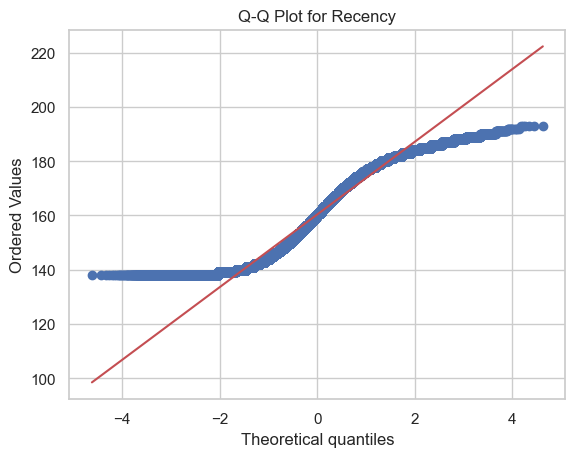

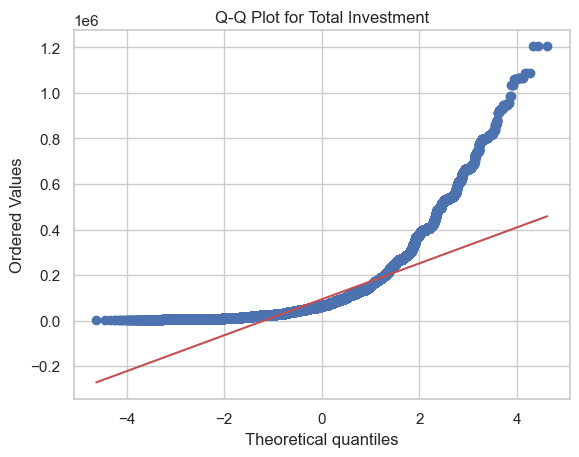

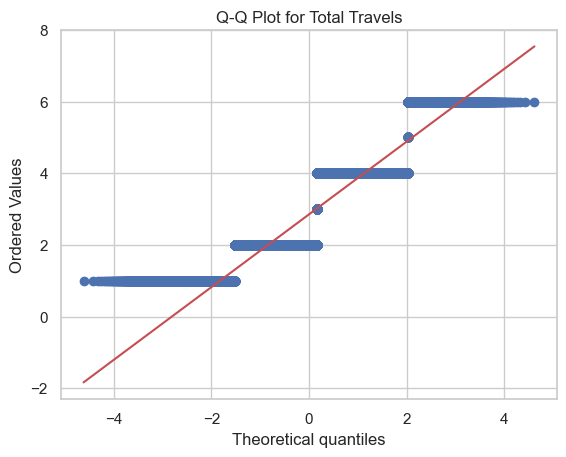

In [124]:

import scipy.stats as stats  
import matplotlib.pyplot as plt

# Q-Q Plot for Recancy
stats.probplot(rfm_segmentation['recancy'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Recency")
plt.show()

# Q-Q Plot for Total Investment
stats.probplot(rfm_segmentation['total_investment'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Total Investment")
plt.show()

# Q-Q Plot for Total Travels
stats.probplot(rfm_segmentation['total_travels'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Total Travels")
plt.show()


In [125]:
group1=rfm_segmentation[rfm_segmentation["final_segment"]=="Premium Customer"]["total_investment"]

group2= rfm_segmentation[rfm_segmentation["final_segment"]=='Medium Value Customer']["total_investment"]

group3 = rfm_segmentation[rfm_segmentation["final_segment"]=='Low Value Customer']["total_investment"]

group4=rfm_segmentation[rfm_segmentation["final_segment"]=='frequent Premium Customer']["total_investment"]


In [126]:
print(f"frequent Premium Customer   {group4.median()}")
print(f"Premium Customer   {group1.median()}")
print(f"Medium Value Customer  {group2.median()}")

print(f"Low Value Customer   {group3.median()}")

frequent Premium Customer   148200.0
Premium Customer   265700.0
Medium Value Customer  83600.0
Low Value Customer   36200.0


### there are signigiciant diffrence in median value of all final segments we need to test this assumption with kruskal walis test beacause data is not normaly distributed  data contain 4 diffrent categories 

1. Ho = There is no significat diffrence  in final segments 
2. Ha = There is significant diffence in final segments

In [127]:

from scipy.stats import kruskal

stat , p_value = kruskal(group1, group2 , group3, group4)

print(f"stat  :{stat} ,   p_value  : {p_value}")

if p_value < 0.05:
    print("reject the null hypothesis : ther is a significant diffrence between  final segments")
else :
    print("fail to reject null hypothesis : there is not significant diffrence")



stat  :261215.73293453682 ,   p_value  : 0.0
reject the null hypothesis : ther is a significant diffrence between  final segments


#### Checking hypothesis for total travel columns
1. Ho = There is no significat diffrence  in final segments 
2. Ha = There is significant diffence in final segments

In [128]:
group1=rfm_segmentation[rfm_segmentation["final_segment"]=="Premium Customer"]["total_travels"]

group2= rfm_segmentation[rfm_segmentation["final_segment"]=='Medium Value Customer']["total_travels"]

group3 = rfm_segmentation[rfm_segmentation["final_segment"]=='Low Value Customer']["total_travels"]

group4=rfm_segmentation[rfm_segmentation["final_segment"]=='frequent Premium Customer']["total_travels"]

In [129]:
print(f"frequent Premium Customer   {group4.median()}")
print(f"Premium Customer   {group1.median()}")
print(f"Medium Value Customer  {group2.median()}")
print(f"Low Value Customer   {group3.median()}")

frequent Premium Customer   4.0
Premium Customer   2.0
Medium Value Customer  4.0
Low Value Customer   2.0


In [130]:
from scipy.stats import kruskal

stat , p_value = kruskal(group1, group2 , group3, group4)

print(f"stat  :{stat} ,   p_value  : {p_value}")

if p_value < 0.05:
    print("reject the null hypothesis : ther is a significant diffrence between  final segments")
else :
    print("fail to reject null hypothesis : there is not significant diffrence")



stat  :181660.0738303525 ,   p_value  : 0.0
reject the null hypothesis : ther is a significant diffrence between  final segments


In [131]:
group1=rfm_segmentation[rfm_segmentation["final_segment"]=="Premium Customer"]["recancy"]

group2= rfm_segmentation[rfm_segmentation["final_segment"]=='Medium Value Customer']["recancy"]

group3 = rfm_segmentation[rfm_segmentation["final_segment"]=='Low Value Customer']["recancy"]

group4=rfm_segmentation[rfm_segmentation["final_segment"]=='frequent Premium Customer']["recancy"]

In [132]:
print(f"frequent Premium Customer   {group4.median()}")
print(f"Premium Customer   {group1.median()}")
print(f"Medium Value Customer  {group2.median()}")
print(f"Low Value Customer   {group3.median()}")

frequent Premium Customer   158.0
Premium Customer   157.0
Medium Value Customer  160.0
Low Value Customer   161.0


In [133]:
from scipy.stats import kruskal

stat , p_value = kruskal(group1, group2 , group3, group4)

print(f"stat  :{stat} ,   p_value  : {p_value}")

if p_value < 0.05:
    print("reject the null hypothesis : ther is a significant diffrence between  final segments")
else :
    print("fail to reject null hypothesis : there is not significant diffrence")


stat  :1841.193209475729 ,   p_value  : 0.0
reject the null hypothesis : ther is a significant diffrence between  final segments


### According to this all analysis the final_segmentation of customer based on frequency recancy monitary is optimized correctly 

#### check final segmentation is evenly distributed and balanced if this not distributed balanced then nees in busines improvement techniques 

In [134]:
# Count the number of customers in each CLV segment
clv_counts = rfm_segmentation["final_segment"].value_counts()

# Expected distribution (equal distribution between segments)
expected_counts = [len(rfm_segmentation) / len(clv_counts)] * len(clv_counts)

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency([clv_counts.values, expected_counts])

# Output the result
print("Chi-Square Test - Customer Distribution Across CLV Segments:")
print(f"Chi2-statistic: {chi2_stat}")
print(f"P-value: {p_val}")

alpha = 0.05
# Interpretation of result
if p_val < alpha:
    print("Reject the null hypothesis: The customer distribution across CLV segments is not even.")
else:
    print("Fail to reject the null hypothesis: The customer distribution across CLV segments is even.")


Chi-Square Test - Customer Distribution Across CLV Segments:
Chi2-statistic: 86232.23973799217
P-value: 0.0
Reject the null hypothesis: The customer distribution across CLV segments is not even.


In [135]:
final_segment = clv_counts.reset_index()
final_segment

,final_segment,count
0,Low Value Customer,183367
1,Medium Value Customer,91684
2,frequent Premium Customer,76234
3,Premium Customer,15448


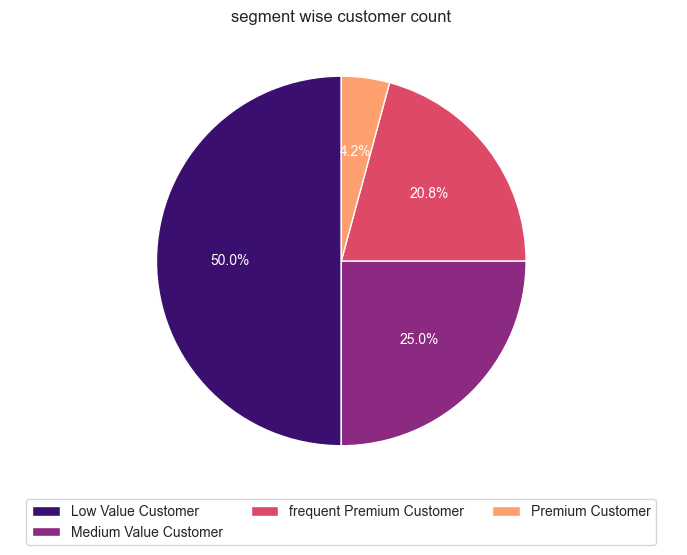

In [138]:
import seaborn as sns
plt.figure(figsize=(12,6))
colors = sns.color_palette("magma"  , len(final_segment))
plt.pie(final_segment["count"],labels=final_segment["final_segment"],colors=colors, autopct = "%1.1f%%" , textprops={'color': 'white', 'fontsize': 10},startangle=90)

# ax = sns.barplot(data= final_segment , x="final_segment" , y="count" , palette="magma")
# for con in ax.containers:
#     ax.bar_label(con)
# plt.xlabel("segments")
# plt.ylabel("total customers")
plt.legend(
    loc= "upper center",
    bbox_to_anchor=(0.5,-0.0001),
    ncol=3 ,
    fontsize=10)
plt.title('segment wise customer count')
plt.show()

✅ Frequent Premium Customers (High Investment & High Frequency)<br>
1️⃣ VIP Loyalty Program: Introduce an exclusive Elite Membership with priority boarding, lounge access, free upgrades, and concierge services.<br>
2️⃣ Customized Travel Benefits: Provide personalized discount offers based on frequently traveled routes and preferred seat selections<br>

<br>

✅ Medium Value Customers (Moderate Investment & Frequency)<br>
1️⃣ Incentivized Booking Promotions: Offer discounted fares for round-trip bookings or business-class upgrades to encourage higher spending.<br>
2️⃣ Loyalty Tiers with Milestone Rewards: Implement a tiered reward system where more flights lead to additional perks (free baggage, priority check-in, etc.).<br>

<br>

<br>

✅ Premium Customers (High Investment but Lower Frequency)<br>
Exclusive Upselling Offers: Provide customized luxury experiences, including chauffeur services, fine dining, and premium lounge access.<br>
2️⃣ Business Travel Perks: Partner with corporate travel agencies to offer discounts on frequent business trips and premium service bundles.


<br>

<br>
✅ Low-Value Customers (Low Investment & Low Frequency)<br>
1️⃣ Budget-Friendly Discounts & Offers: Launch targeted seasonal promotions and limited-time discounts to increase engagement.<br>
2️⃣ Referral & First-Time Traveler Incentives: Introduce discounts for first-time travelers and referral bonuses for bringing new customers.<br>

## Time Series Analysis

In [140]:
index_queries = [
    "CREATE INDEX IF NOT EXISTS idx_flight_id ON flights(flight_id);",
    "CREATE INDEX IF NOT EXISTS idx_ticket_flight_id ON ticket_flights(flight_id);",
    "CREATE INDEX IF NOT EXISTS idx_ticket_no ON tickets(ticket_no);",
    "CREATE INDEX IF NOT EXISTS idx_ticket_flight_no ON ticket_flights(ticket_no);",
    "CREATE INDEX IF NOT EXISTS idx_book_ref ON bookings(book_ref);",
    "CREATE INDEX IF NOT EXISTS idx_ticket_book_ref ON tickets(book_ref);",
    "CREATE INDEX IF NOT EXISTS idx_aircraft_code ON flights(aircraft_code);",
    "CREATE INDEX IF NOT EXISTS idx_seats_aircraft_code ON seats(aircraft_code);"
]

cur = conn.cursor()

# Execute each index creation query
for query in index_queries:
    cur.execute(query)

# Commit and close connection



data = pd.read_sql_query("""SELECT 
                                    f.aircraft_code,
                                    b.book_date,
                                    f.scheduled_departure,
                                    SUM(t.amount) AS total_revenue,
                                    t.fare_conditions,  -- Get it directly from ticket_flights if available
                                    ts.passenger_id,
                                    COUNT(t.ticket_no) AS total_tickets
                                FROM ticket_flights t
                                INNER JOIN flights f ON t.flight_id = f.flight_id
                                INNER JOIN tickets ts ON t.ticket_no = ts.ticket_no
                                INNER JOIN bookings b ON ts.book_ref = b.book_ref
                                GROUP BY f.aircraft_code, b.book_date, f.scheduled_departure, ts.passenger_id, t.fare_conditions;

                                """,conn)


In [141]:
data1 = rfm_segmentation[["passenger_id" ,"final_segment"]]

df1 = pd.merge(data1 , data , on="passenger_id" , how="inner")
df1.head()

,passenger_id,final_segment,aircraft_code,book_date,scheduled_departure,total_revenue,fare_conditions,total_tickets
0,0000 000343,Premium Customer,319,2017-07-13 21:49:00+03,2017-07-24 20:05:00+03,66600,Economy,1
1,0000 000343,Premium Customer,319,2017-07-13 21:49:00+03,2017-07-31 09:55:00+03,66600,Economy,1
2,0000 035204,Premium Customer,763,2017-07-23 18:41:00+03,2017-08-06 20:40:00+03,61500,Economy,1
3,0000 035204,Premium Customer,763,2017-07-23 18:41:00+03,2017-08-15 12:55:00+03,61500,Economy,1
4,0000 076149,Premium Customer,319,2017-07-30 04:18:00+03,2017-08-18 17:15:00+03,66400,Economy,1


### EDA 

In [142]:
df1["book_date"] = pd.to_datetime(df1["book_date"].str.slice(0,19), format = "%Y-%m-%d %H:%M:%S")

df1["scheduled_departure"] = pd.to_datetime(df1["scheduled_departure"].str.slice(0,19) , format = "%Y-%m-%d %H:%M:%S")


In [143]:
print( f"duplicate values present in df1 {df1.duplicated().sum()}")
df1.drop_duplicates(inplace=True)

duplicate values present in df1 0


In [144]:
df1["booking lead time"] = (df1["scheduled_departure"]-df1["book_date"]).dt.days

In [145]:
df1["month"] = df1["book_date"].dt.month_name()
df1["day"] = df1["book_date"].dt.day_name()
df1["hour"] = df1["book_date"].dt.hour

In [146]:
df1

,passenger_id,final_segment,aircraft_code,book_date,scheduled_departure,total_revenue,fare_conditions,total_tickets,booking lead time,month,day,hour
0,0000 000343,Premium Customer,319,2017-07-13 21:49:00,2017-07-24 20:05:00,66600,Economy,1,10,July,Thursday,21
1,0000 000343,Premium Customer,319,2017-07-13 21:49:00,2017-07-31 09:55:00,66600,Economy,1,17,July,Thursday,21
2,0000 035204,Premium Customer,763,2017-07-23 18:41:00,2017-08-06 20:40:00,61500,Economy,1,14,July,Sunday,18
3,0000 035204,Premium Customer,763,2017-07-23 18:41:00,2017-08-15 12:55:00,61500,Economy,1,22,July,Sunday,18
4,0000 076149,Premium Customer,319,2017-07-30 04:18:00,2017-08-18 17:15:00,66400,Economy,1,19,July,Sunday,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1045721,9999 939010,Low Value Customer,CR2,2017-07-16 12:36:00,2017-08-06 14:00:00,14000,Economy,1,21,July,Sunday,12
1045722,9999 979738,frequent Premium Customer,773,2017-07-24 12:04:00,2017-08-11 14:20:00,28000,Economy,1,18,July,Monday,12
1045723,9999 979738,frequent Premium Customer,773,2017-07-24 12:04:00,2017-08-18 12:50:00,14400,Economy,1,25,July,Monday,12
1045724,9999 979738,frequent Premium Customer,CR2,2017-07-24 12:04:00,2017-08-10 12:00:00,15600,Economy,1,16,July,Monday,12


In [148]:
monthly_revenue = df1.groupby("month")[["total_revenue" , "total_tickets"]].sum().reset_index()
weekely_revenue = df1.groupby("day")[["total_revenue" , "total_tickets"]].sum().reset_index()
hourly_revenue = df1.groupby("hour")[["total_revenue" , "total_tickets"]].sum().reset_index()


In [ ]:
monthly_revenue

,month,total_revenue,total_tickets
0,August,6975368100,354497
1,July,13234251800,662407
2,June,557361000,28822


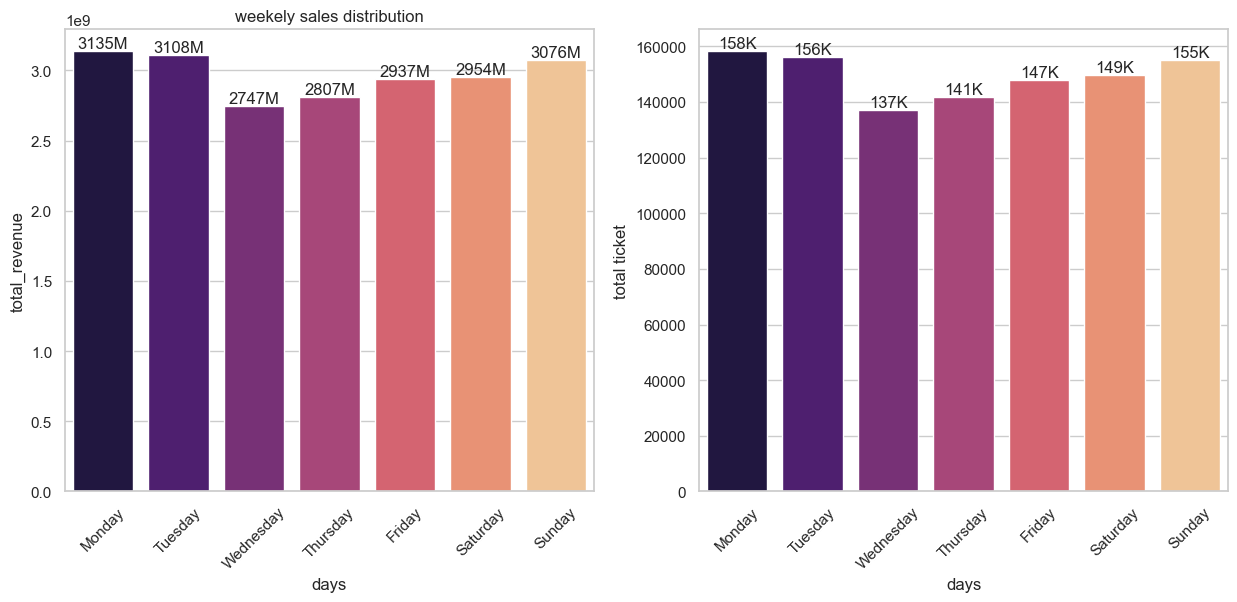

In [155]:
import pandas as pd

# Define the correct order of days
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# # Convert 'day' column to categorical with the specified order
weekely_revenue["day"] = pd.Categorical(weekely_revenue["day"], categories=day_order, ordered=True)

# # Sort the DataFrame based on the categorical day order
weekely_revenue = weekely_revenue.sort_values("day").reset_index(drop=True)

# # Display the sorted DataFrame
weekely_revenue

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)

ax = sns.barplot(data=weekely_revenue , x="day" ,y="total_revenue", palette="magma")
for col in ax.containers:
    ax.bar_label(col,[f'{int(label/1e6)}M' for label in col.datavalues])
plt.ylabel("total_revenue")
plt.xlabel("days")
plt.title("weekely sales distribution")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
ax1 = sns.barplot(data=weekely_revenue , x="day" ,y="total_tickets" , palette="magma")
for i in ax1.containers:
    ax1.bar_label(i , [f'{int(label/1000)}K' for label in i.datavalues])
plt.ylabel("total ticket")
plt.xlabel("days")
plt.xticks(rotation=45)
plt.show()


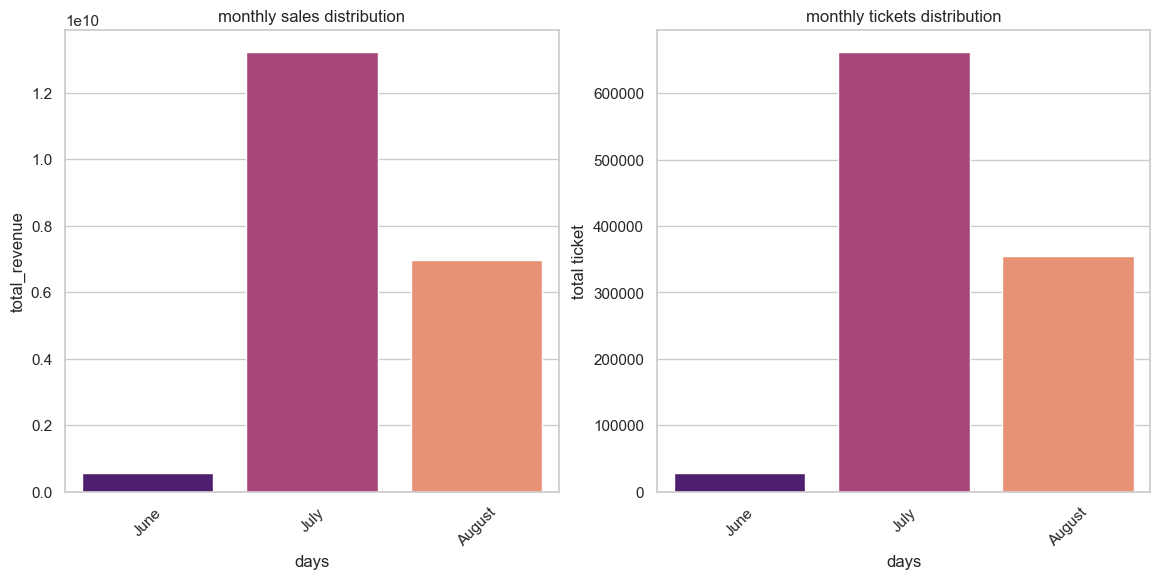

,month,total_revenue,total_tickets
0,June,557361000,28822
1,July,13234251800,662407
2,August,6975368100,354497


In [ ]:
month_order = ["June" , "July" , "August"]

monthly_revenue["month"] = pd.Categorical(monthly_revenue["month"] , categories= month_order , ordered=True)

monthly_revenue= monthly_revenue.sort_values("month").reset_index(drop=True)


plt.figure(figsize=(14,6))
plt.subplot(1,2,1)

sns.barplot(data=monthly_revenue , x="month" ,y="total_revenue", palette="magma")
plt.ylabel("total_revenue")
plt.xlabel("days")
plt.title("monthly sales distribution")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(data=monthly_revenue , x="month" ,y="total_tickets" , palette="magma")
plt.ylabel("total ticket")
plt.xlabel("days")
plt.title("monthly tickets distribution")
plt.xticks(rotation=45)
plt.show()



monthly_revenue

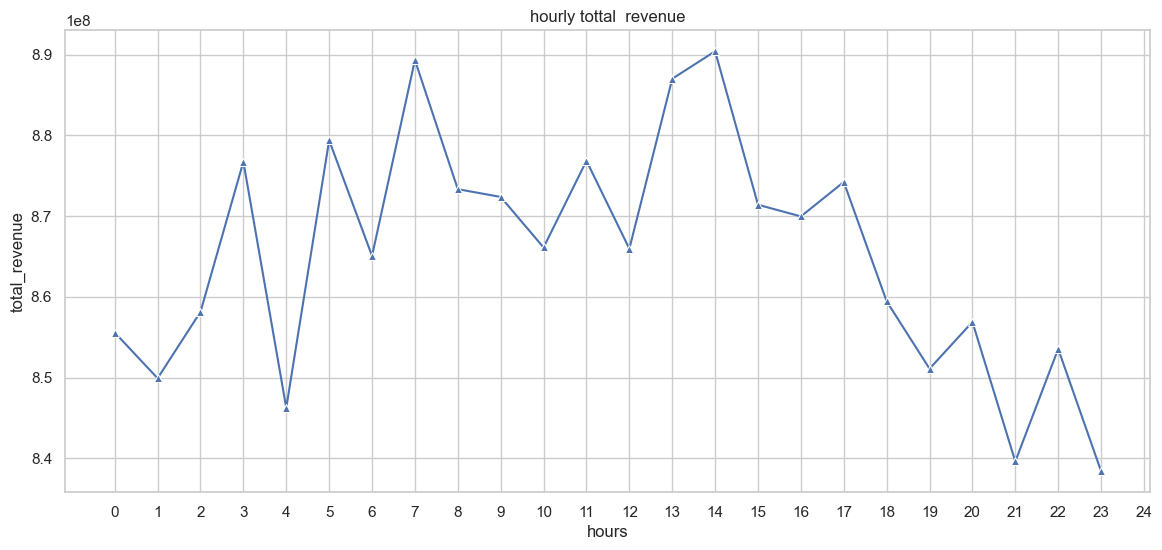

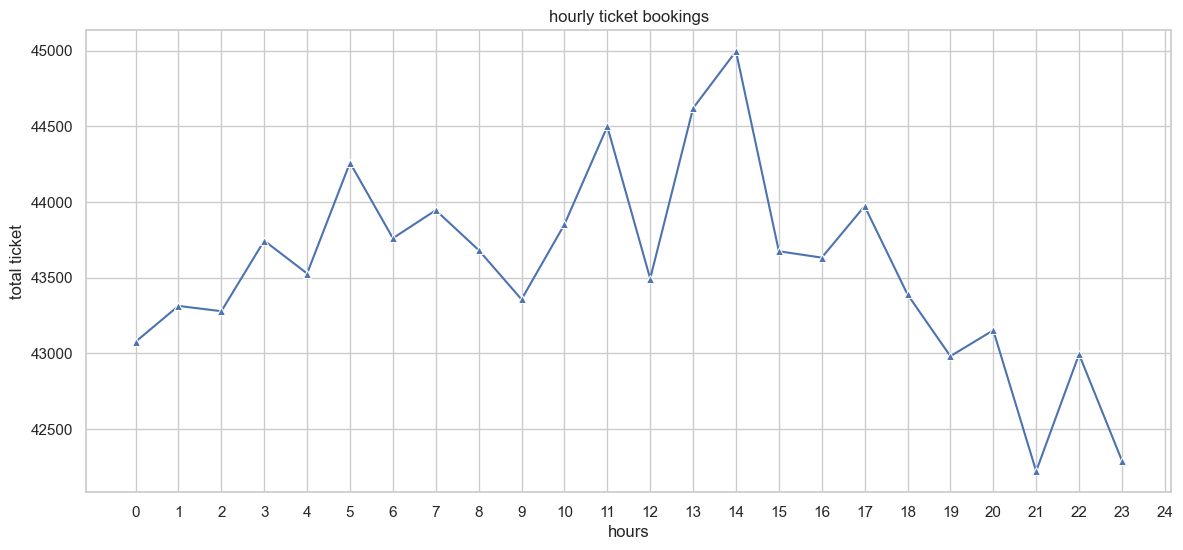

In [149]:

hourly_revenue
plt.figure(figsize=(14,6))


sns.lineplot(data=hourly_revenue , x="hour" ,y="total_revenue", palette="magma",marker="^")
plt.ylabel("total_revenue")
plt.xlabel("hours")
plt.title("weekely sales distribution")
positions = list(range(25))  #
labels = [str(i) for i in positions]  
plt.xticks(ticks=positions, labels=labels)
plt.title("hourly tottal  revenue")

plt.show()

plt.figure(figsize=(14,6))
sns.lineplot(data=hourly_revenue , x="hour" ,y="total_tickets" , palette="magma", marker="^")
plt.ylabel("total ticket")
plt.xlabel("hours")
plt.title("hourly ticket bookings")
positions = list(range(25))  #
labels = [str(i) for i in positions]  
plt.xticks(ticks=positions, labels=labels)


plt.show()

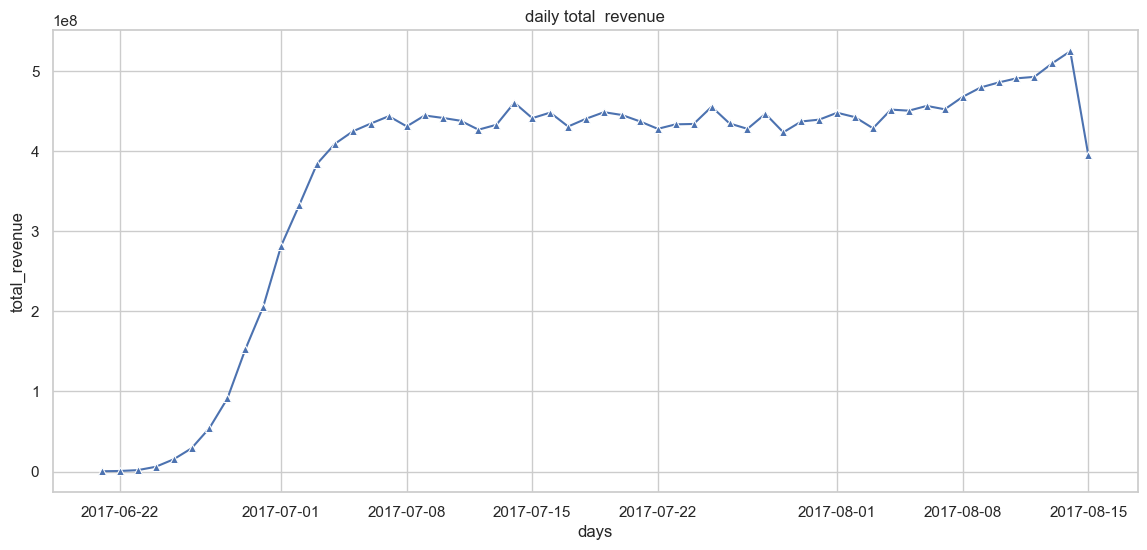

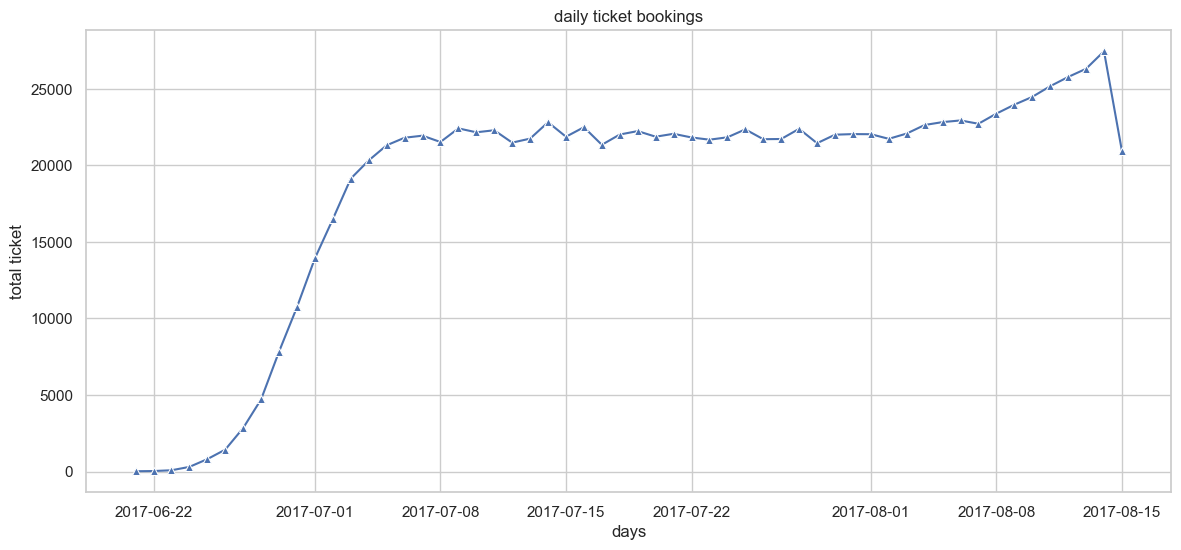

In [156]:
df1["date"] = df1["book_date"].dt.date


daily_revenue = df1.groupby("date")[["total_revenue" , "total_tickets"]].sum().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(data=daily_revenue , x="date" ,y="total_revenue", palette="magma",marker="^")
plt.ylabel("total_revenue")
plt.xlabel("days")

plt.title("daily total  revenue")


plt.show()

plt.figure(figsize=(14,6))
sns.lineplot(data=daily_revenue , x="date" ,y="total_tickets" , palette="magma", marker="^")
plt.ylabel("total ticket")
plt.xlabel("days")
plt.title("daily ticket bookings")
plt.show()